<a href="https://colab.research.google.com/github/Kishankumar1328/Machine_Learning/blob/main/Diabetes_analysis_by_using_logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import itertools
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,jaccard_score,log_loss

In [47]:
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [48]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
182,1,0,74,20,23,27.7,0.299,21,0
55,1,73,50,10,0,23.0,0.248,21,0
217,6,125,68,30,120,30.0,0.464,32,0
427,1,181,64,30,180,34.1,0.328,38,1
87,2,100,68,25,71,38.5,0.324,26,0


In [49]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [52]:
df["DiabetesPedigreeFunction"].max()

2.42

In [53]:
x=np.asanyarray(df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
y=np.asanyarray(df["Outcome"])
print(x[0:5])
print(y[0:5])

[[6.00e+00 1.48e+02 7.20e+01 3.50e+01 0.00e+00 3.36e+01 6.27e-01 5.00e+01]
 [1.00e+00 8.50e+01 6.60e+01 2.90e+01 0.00e+00 2.66e+01 3.51e-01 3.10e+01]
 [8.00e+00 1.83e+02 6.40e+01 0.00e+00 0.00e+00 2.33e+01 6.72e-01 3.20e+01]
 [1.00e+00 8.90e+01 6.60e+01 2.30e+01 9.40e+01 2.81e+01 1.67e-01 2.10e+01]
 [0.00e+00 1.37e+02 4.00e+01 3.50e+01 1.68e+02 4.31e+01 2.29e+00 3.30e+01]]
[1 0 1 0 1]


In [54]:
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:5]

array([[ 0.64,  0.85,  0.15,  0.91, -0.69,  0.2 ,  0.47,  1.43],
       [-0.84, -1.12, -0.16,  0.53, -0.69, -0.68, -0.37, -0.19],
       [ 1.23,  1.94, -0.26, -1.29, -0.69, -1.1 ,  0.6 , -0.11],
       [-0.84, -1.  , -0.16,  0.15,  0.12, -0.49, -0.92, -1.04],
       [-1.14,  0.5 , -1.5 ,  0.91,  0.77,  1.41,  5.48, -0.02]])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [56]:
print("Train_set:",x_train.shape,y_train.shape)
print("Test_set:",x_test.shape,y_test.shape)

Train_set: (614, 8) (614,)
Test_set: (154, 8) (154,)


In [72]:
lr=LogisticRegression(C=0.01,solver="liblinear").fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [73]:
yhat=lr.predict(x_test)
yhat[0:5]

array([0, 0, 0, 1, 1])

In [74]:
yhat_prob=lr.predict_proba(x_test)
yhat_prob[0:5]

array([[0.73, 0.27],
       [0.69, 0.31],
       [0.67, 0.33],
       [0.3 , 0.7 ],
       [0.46, 0.54]])

In [75]:
jaccard_score(y_test,yhat,pos_label=0)

0.71900826446281

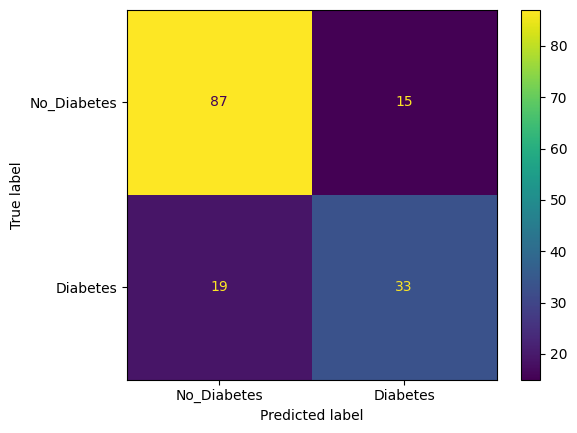

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])


disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=["No_Diabetes", "Diabetes"])
disp.plot()

plt.show()


In [77]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       102
           1       0.69      0.63      0.66        52

    accuracy                           0.78       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



In [79]:
log_loss(y_test,yhat)

7.957689709285605